In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
fin_metrics_path = '/Users/dhiren/Documents/University of Massachusetss Boston/Studies/Industry Practicum/Data/Financial Analysis 5.xlsx'
econ_indicators = '/Users/dhiren/Documents/University of Massachusetss Boston/Studies/Industry Practicum/Data/Economic Indicators (Historical 4 year data).xlsx'

In [3]:
try:
    all_sectors_data = pd.read_excel(fin_metrics_path, sheet_name=None)
except FileNotFoundError:
    print("The specified file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [4]:
# all sectors together
# Printing the first 5 rows of each sector to verify
for sector, data in all_sectors_data.items():
    print(f"First 5 rows of data for sector: {sector}")
    print(data.head(), "\n")

First 5 rows of data for sector: Information Technology
          Ticker                                  Name Subgroup  \
0  CDW UW Equity                           CDW Corp/DE       --   
1  HPQ UN Equity                                HP Inc       --   
2  TDY UN Equity             Teledyne Technologies Inc       --   
3  IBM UN Equity  International Business Machines Corp       --   
4  APH UN Equity                         Amphenol Corp       --   

   Revenue Growth Earnings Growth Debt/Equity        ROE  Profit Margin  \
0       -8.602651        2.572899  324.325958  69.859695       5.605600   
1      -14.631474       32.203388          --         --       7.049287   
2        3.925334         7.78956   37.194878   9.615853      14.160428   
3        1.052319        31.65266  253.563538  32.092129      11.550976   
4        0.448001       -3.406255   54.627838  26.630716      16.063391   

         P/B        P/E    Market Cap Dividend Yield  
0  14.936928  23.541119   284906905

In [5]:
# Getting sector data seperately
print("Available Sectors:")
for sector in all_sectors_data.keys():
    print(sector)

# Interactive part to view specific sector data
while True:
    sector_input = input("Enter a sector name to view its data or type 'exit' to quit: ").strip()

    if sector_input.lower() == 'exit':
        break

    if sector_input in all_fin_metrics:
        print(f"Data for sector: {sector_input}")
        print(all_fin_metrics[sector_input].head())  # Display the first 5 rows of the sector
    else:
        print("Sector not found. Please enter a valid sector name.")

Available Sectors:
Information Technology
Financial
Health Care
Consumer Discretionary
Communications
Industrials
Consumer Staples
Energy
Real Estate
Materials
Utilities
Enter a sector name to view its data or type 'exit' to quit: exit


In [6]:
for sector, data in all_sectors_data.items():
    print(f"Column names for sector: {sector}")
    print(data.columns.tolist())  # Convert Index object to a list for better readability
    print("\n")  # New line for readability

Column names for sector: Information Technology
['Ticker', 'Name', 'Subgroup', 'Revenue Growth', 'Earnings Growth', 'Debt/Equity', 'ROE', 'Profit Margin', 'P/B', 'P/E', 'Market Cap', 'Dividend Yield']


Column names for sector: Financial
['Ticker', 'Name', 'Subgroup', 'Revenue Growth', 'Earnings Growth', 'Debt/Equity', 'ROE', 'Profit Margin', 'P/B', 'P/E', 'Market Cap', 'Dividend Yield']


Column names for sector: Health Care
['Ticker', 'Name', 'Subgroup', 'Revenue Growth', 'Earnings Growth', 'Debt/Equity', 'ROE', 'Profit Margin', 'P/B', 'P/E', 'Market Cap', 'Dividend Yield']


Column names for sector: Consumer Discretionary
['Ticker', 'Name', 'Subgroup', 'Revenue Growth', 'Earnings Growth', 'Debt/Equity', 'ROE', 'Profit Margin', 'P/B', 'P/E', 'Market Cap', 'Dividend Yield']


Column names for sector: Communications
['Ticker', 'Name', 'Subgroup', 'Revenue Growth', 'Earnings Growth', 'Debt/Equity', 'ROE', 'Profit Margin', 'P/B', 'P/E', 'Market Cap', 'Dividend Yield']


Column names for 

In [7]:
def count_missing_values(data):
    return data.isnull().sum()

In [8]:
# Preprocessed data
for sector, data in all_sectors_data.items():
    print(f"Processing sector: {sector}")
    
        
    # Replace common placeholders with NaN
    data.replace(['--', 'NA', '-'], pd.NA, inplace=True)
   
    # Replace '\n' in column names with a space
    data.columns = data.columns.str.replace('\n', ' ', regex=False)
    
    # Count and display missing values before preprocessing
    print("Missing values before preprocessing:")
    print(count_missing_values(data))
    print("\n") 

Processing sector: Information Technology
Missing values before preprocessing:
Ticker              0
Name                0
Subgroup           64
Revenue Growth      0
Earnings Growth     7
Debt/Equity         4
ROE                 8
Profit Margin       0
P/B                 4
P/E                 4
Market Cap          0
Dividend Yield     29
dtype: int64


Processing sector: Financial
Missing values before preprocessing:
Ticker              0
Name                0
Subgroup           72
Revenue Growth      0
Earnings Growth    49
Debt/Equity         2
ROE                 2
Profit Margin       0
P/B                 2
P/E                 1
Market Cap          0
Dividend Yield      5
dtype: int64


Processing sector: Health Care
Missing values before preprocessing:
Ticker              0
Name                0
Subgroup           64
Revenue Growth      0
Earnings Growth     6
Debt/Equity         4
ROE                 5
Profit Margin       0
P/B                 4
P/E                 2
Market Ca

In [9]:
# Processing data

essential_columns = ['Revenue Growth', 'Debt/Equity', 'Earnings Growth', 
                     'P/B', 'P/E', 'Profit Margin', 'ROE', 'Dividend Yield']

for sector, data in all_sectors_data.items():
    print(f"Preprocessing data for sector: {sector}")

    # Handling missing values
    data.dropna(subset=essential_columns, inplace=True)
    
    # Remove unwanted columns
    removed_columns = ['Weight', 'Subgroup', 'Subgroup Weight', 'Shares']
    data.drop(columns=removed_columns, errors='ignore', inplace=True)

    # Ensure correct data types: Convert financial metrics to numeric
    data[essential_columns] = data[essential_columns].apply(pd.to_numeric, errors='coerce')

    # Store the processed data back into the main dictionary
    all_sectors_data[sector] = data

    # Display the processed data to confirm changes
    print("Missing values after preprocessing:")
    print(count_missing_values(data))
    print("\n") 
    
# This dropped valued for only the variables being used.


Preprocessing data for sector: Information Technology
Missing values after preprocessing:
Ticker             0
Name               0
Revenue Growth     0
Earnings Growth    0
Debt/Equity        0
ROE                0
Profit Margin      0
P/B                0
P/E                0
Market Cap         0
Dividend Yield     0
dtype: int64


Preprocessing data for sector: Financial
Missing values after preprocessing:
Ticker             0
Name               0
Revenue Growth     0
Earnings Growth    0
Debt/Equity        0
ROE                0
Profit Margin      0
P/B                0
P/E                0
Market Cap         0
Dividend Yield     0
dtype: int64


Preprocessing data for sector: Health Care
Missing values after preprocessing:
Ticker             0
Name               0
Revenue Growth     0
Earnings Growth    0
Debt/Equity        0
ROE                0
Profit Margin      0
P/B                0
P/E                0
Market Cap         0
Dividend Yield     0
dtype: int64


Preprocessing da

In [10]:
def extract_ticker(name):
    # Split the string by space and take the first part
    return name.split()[0]

# Assuming all_sectors_data is your dictionary of DataFrames for each sector
for sector, data in all_sectors_data.items():
    print(f"Extracting tickers for sector: {sector}")

    # Check if the 'Ticker Name' column exists in the DataFrame
    if 'Ticker' in data.columns:
        # Apply the function to extract ticker symbols
        data['Ticker'] = data['Ticker'].apply(extract_ticker)
    else:
        print(f"No 'Ticker Name' column found in sector: {sector}")

    # Optionally, display the first few rows to verify
    print(data.head())

    # Update the DataFrame in the dictionary
    all_sectors_data[sector] = data


Extracting tickers for sector: Information Technology
  Ticker                                  Name  Revenue Growth  \
0    CDW                           CDW Corp/DE       -8.602651   
3    IBM  International Business Machines Corp        1.052319   
4    APH                         Amphenol Corp        0.448001   
5    ACN                         Accenture PLC        4.087131   
8   CSCO                     Cisco Systems Inc       10.987014   

   Earnings Growth  Debt/Equity        ROE  Profit Margin        P/B  \
0         2.572899   324.325958  69.859695       5.605600  14.936928   
3        31.652660   253.563538  32.092129      11.550976   5.550476   
4        -3.406255    54.627838  26.630716      16.063391   6.417269   
5       -15.663113    12.256466  28.751925       8.588964   7.921226   
8        20.790960    19.228046  31.775110      24.802292   4.617705   

         P/E    Market Cap  Dividend Yield  
0  23.541119   28490690560        1.123754  
3  15.188376  142126907392

In [11]:
import pandas as pd

# Assuming all_sectors_data is the dictionary with processed data from Step 2

# Metrics for which we need sector averages
metrics_for_averages = ['Revenue Growth', 'Debt/Equity', 'Earnings Growth', 
                        'P/B', 'P/E', 'Profit Margin', 'ROE', 'Dividend Yield']

# Dictionary to store sector averages
sector_averages = {}

# Calculate averages for each sector
for sector, data in all_sectors_data.items():
    print(f"Calculating averages for sector: {sector}")

    # Initialize a dictionary to store averages for the current sector
    sector_averages[sector] = {}

    for metric in metrics_for_averages:
        if metric in data.columns:
            # Calculate the mean for each metric, ignoring NaN values
            average_value = data[metric].mean(skipna=True)
            sector_averages[sector][metric] = average_value
    
    # Print sector averages for verification
    print(f"Sector Averages for {sector}:")
    for metric, avg in sector_averages[sector].items():
        print(f"{metric}: {avg}")
    print("\n")  # New line for readability

# Optionally, convert the dictionary to a DataFrame for easier handling
sector_averages_df = pd.DataFrame(sector_averages).T


Calculating averages for sector: Information Technology
Sector Averages for Information Technology:
Revenue Growth: 3.2076585768005192
Debt/Equity: 97.93314110924457
Earnings Growth: 55.3109725549303
P/B: 9.412037569901042
P/E: 23.620851812691523
Profit Margin: 20.7046003670528
ROE: 42.157385941209455
Dividend Yield: 1.794315922491509


Calculating averages for sector: Financial
Sector Averages for Financial:
Revenue Growth: 8.640157157008181
Debt/Equity: 87.21220395144294
Earnings Growth: 12.258313978419594
P/B: 8.763030080234296
P/E: 27.443938423605537
Profit Margin: 24.558858282425824
ROE: 24.71579484378588
Dividend Yield: 1.3669370167395654


Calculating averages for sector: Health Care
Sector Averages for Health Care:
Revenue Growth: 1.7900401559423507
Debt/Equity: 110.8997550733162
Earnings Growth: -1.1449265263297324
P/B: 6.270885458498287
P/E: 25.152721578424625
Profit Margin: 16.888675964239894
ROE: 21.83334098440228
Dividend Yield: 1.7034178531982682


Calculating averages fo

In [12]:
# Function to display investment strategy options and capture user selection
def select_investment_strategy():
    print("Select an Investment Strategy:")
    print("1. Peter Lynch's 'Fast Growers' Strategy")
    print("2. Philip Fisher's Quality Growth Strategy")
    print("3. Warren Buffett's Value Investing")
    print("4. Benjamin Graham's Defensive Investing")

    # User input for strategy selection
    while True:
        user_choice = input("Enter the number of your chosen strategy (or 'exit' to quit): ")

        # Dictionary mapping strategies to their respective criteria identifiers
        strategy_map = {
            '1': "Peter Lynch",
            '2': "Philip Fisher",
            '3': "Warren Buffett",
            '4': "Benjamin Graham"
        }

        # Handle user choice
        if user_choice.lower() == 'exit':
            print("Exiting the strategy selection.")
            return None
        elif user_choice in strategy_map:
            selected_strategy = strategy_map[user_choice]
            print(f"You have selected: {selected_strategy}")
            return selected_strategy
        else:
            print("Invalid selection. Please enter a valid number.")

# Call the function and store the selected strategy
selected_strategy = select_investment_strategy()

# Proceed based on the selected strategy
if selected_strategy:
    # Subsequent filtering will be based on this choice
    print(f"Proceeding with the {selected_strategy} strategy...")
    # Filtering logic will be implemented in the next steps
else:
    # Handle the case where no valid strategy was selected
    print("No valid investment strategy selected.")

Select an Investment Strategy:
1. Peter Lynch's 'Fast Growers' Strategy
2. Philip Fisher's Quality Growth Strategy
3. Warren Buffett's Value Investing
4. Benjamin Graham's Defensive Investing
Enter the number of your chosen strategy (or 'exit' to quit): 2
You have selected: Philip Fisher
Proceeding with the Philip Fisher strategy...


In [13]:
#Filtering Stocks Based on Strategy

def filter_for_peter_lynch(data, averages):
    return data[
        (data['Revenue Growth'] > averages['Revenue Growth']) &
        (data['Earnings Growth'] > averages['Earnings Growth']) &
        (data['P/E'] < averages['P/E'])
    ]

def filter_for_philip_fisher(data, averages):
    return data[
        (data['Revenue Growth'] > averages['Revenue Growth']) &
        (data['Earnings Growth'] > averages['Earnings Growth']) &
        (data['ROE'] > averages['ROE']) &
        (data['P/B'] < averages['P/B'])
    ]

def filter_for_warren_buffett(data, averages):
    return data[
        (data['P/E'] < averages['P/E']) &
        (data['ROE'] > averages['ROE']) &
        (data['Debt/Equity'] < averages['Debt/Equity']) &
        (data['Profit Margin'] > averages['Profit Margin'])
    ]

def filter_for_benjamin_graham(data, averages):
    return data[
        (data['P/E'] < averages['P/E']) &
        (data['P/B'] < averages['P/B']) &
        # Assuming Dividend Yield data is available and calculated
        (data['Dividend Yield'] > averages['Dividend Yield']) &
        (data['Debt/Equity'] < averages['Debt/Equity'])
    ]

In [14]:
# Assuming 'selected_strategy' is obtained from Step 4
# and 'sector_averages_df' is a DataFrame with sector averages

# Map strategy names to their respective filter functions
strategy_filter_functions = {
    'Peter Lynch': filter_for_peter_lynch,
    'Philip Fisher': filter_for_philip_fisher,
    'Warren Buffett': filter_for_warren_buffett,
    'Benjamin Graham': filter_for_benjamin_graham
}

filtered_stocks = {}  # Dictionary to store the filtered stocks by sector

if selected_strategy in strategy_filter_functions:
    filter_function = strategy_filter_functions[selected_strategy]

    # Apply the filter to each sector's data
    for sector, data in all_sectors_data.items():
        averages = sector_averages_df.loc[sector]
        filtered_data = filter_function(data, averages)
        filtered_stocks[sector] = filtered_data

        # Optional: Display the filtered data
        print(f"Filtered data for sector {sector} using {selected_strategy} strategy:")
        print(filtered_data.head())  # Display the first few rows of the filtered data
        print("\n")
else:
    print("No valid strategy selected for filtering.")


Filtered data for sector Information Technology using Philip Fisher strategy:
Empty DataFrame
Columns: [Ticker, Name, Revenue Growth, Earnings Growth, Debt/Equity, ROE, Profit Margin, P/B, P/E, Market Cap, Dividend Yield]
Index: []


Filtered data for sector Financial using Philip Fisher strategy:
Empty DataFrame
Columns: [Ticker, Name, Revenue Growth, Earnings Growth, Debt/Equity, ROE, Profit Margin, P/B, P/E, Market Cap, Dividend Yield]
Index: []


Filtered data for sector Health Care using Philip Fisher strategy:
   Ticker                      Name  Revenue Growth  Earnings Growth  \
2     RMD                ResMed Inc       20.710020         4.808170   
17    UNH    UnitedHealth Group Inc       14.237206        14.258912   
20    BAX  Baxter International Inc        3.653633        98.229164   

    Debt/Equity        ROE  Profit Margin       P/B        P/E    Market Cap  \
2     35.188862  23.596745      19.905455  5.117070  23.852758   22899267584   
17    74.998222  27.255247   

In [15]:
print("Number of companies in each sector before filtering:")

for sector, data in all_sectors_data.items():
    total_companies_before = len(data)
    print(f"{sector}: {total_companies_before} companies")

Number of companies in each sector before filtering:
Information Technology: 29 companies
Financial: 17 companies
Health Care: 33 companies
Consumer Discretionary: 20 companies
Communications: 10 companies
Industrials: 60 companies
Consumer Staples: 28 companies
Energy: 23 companies
Real Estate: 28 companies
Materials: 26 companies
Utilities: 27 companies


In [16]:
print("Number of companies in each sector after filtering:")

for sector, filtered_data in filtered_stocks.items():
    total_companies_after = len(filtered_data)
    print(f"{sector}: {total_companies_after} companies")

Number of companies in each sector after filtering:
Information Technology: 0 companies
Financial: 0 companies
Health Care: 3 companies
Consumer Discretionary: 0 companies
Communications: 0 companies
Industrials: 8 companies
Consumer Staples: 0 companies
Energy: 0 companies
Real Estate: 0 companies
Materials: 1 companies
Utilities: 1 companies


In [17]:
# Function to display the final list of filtered stocks sector-wise
def display_filtered_stocks_sector_wise(filtered_stocks):
    for sector, stocks in filtered_stocks.items():
        print(f"Filtered stocks in sector: {sector}")
        if not stocks.empty:
            print(stocks)
        else:
            print("No stocks met the criteria in this sector.")
        print("\n")  # New line for better readability

    # Optional: Save the final list to a CSV file
    save_choice = input("Do you want to save the final list to a CSV file? (yes/no): ").lower()
    if save_choice == 'yes':
        combined_filtered_stocks = pd.concat(filtered_stocks.values(), ignore_index=True)
        combined_filtered_stocks.to_csv('Filtered_Stocks_Sector_Wise.csv', index=False)
        print("Filtered stocks saved to 'Filtered_Stocks_Sector_Wise.csv'.")
    else:
        print("Final list not saved.")

# Assuming 'filtered_stocks' is the dictionary containing the filtered data from Step 5
display_filtered_stocks_sector_wise(filtered_stocks)


Filtered stocks in sector: Information Technology
No stocks met the criteria in this sector.


Filtered stocks in sector: Financial
No stocks met the criteria in this sector.


Filtered stocks in sector: Health Care
   Ticker                      Name  Revenue Growth  Earnings Growth  \
2     RMD                ResMed Inc       20.710020         4.808170   
17    UNH    UnitedHealth Group Inc       14.237206        14.258912   
20    BAX  Baxter International Inc        3.653633        98.229164   

    Debt/Equity        ROE  Profit Margin       P/B        P/E    Market Cap  \
2     35.188862  23.596745      19.905455  5.117070  23.852758   22899267584   
17    74.998222  27.255247       6.324098  5.519632  21.883247  499949862912   
20   208.974197  38.017014      67.637543  2.363333  22.613577   18436136960   

    Dividend Yield  
2         1.181912  
17        1.306125  
20        3.192075  


Filtered stocks in sector: Consumer Discretionary
No stocks met the criteria in this sec

[*********************100%%**********************]  14 of 14 completed


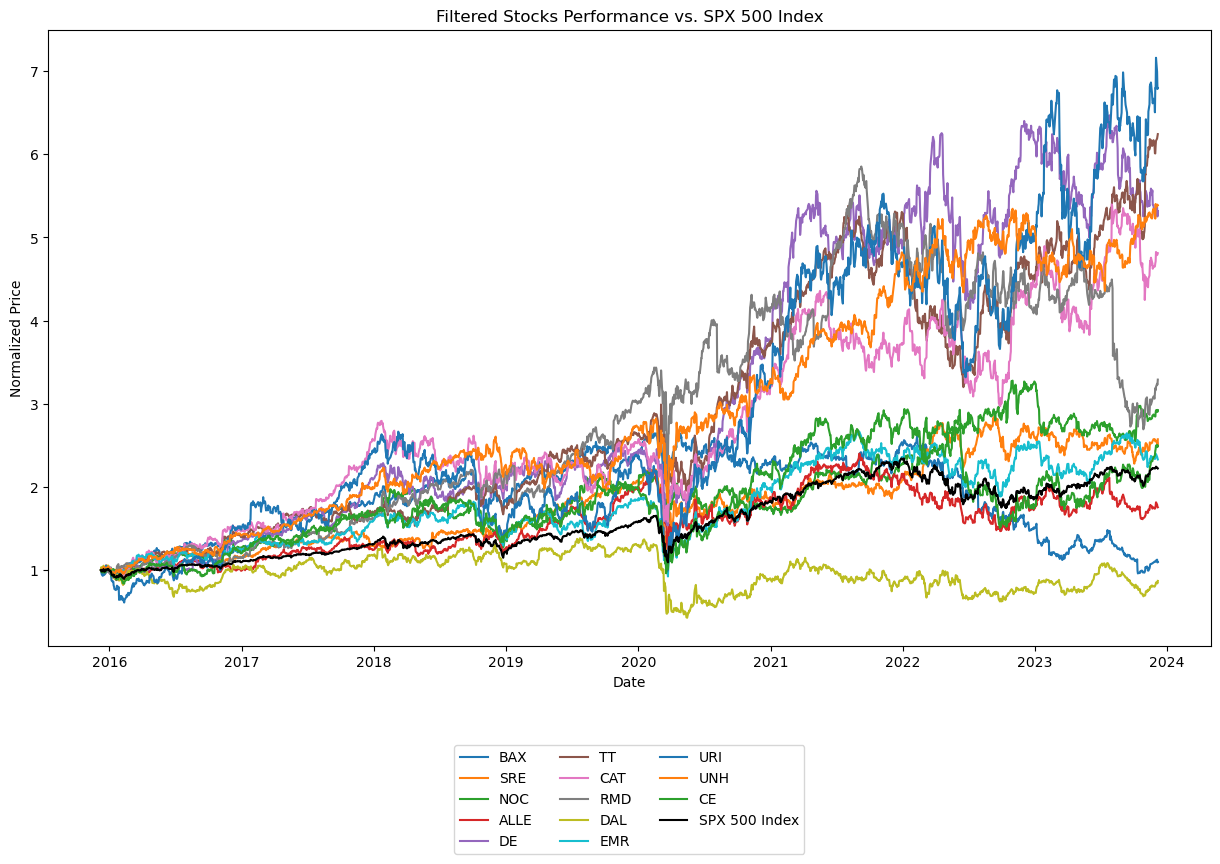

In [18]:
def plot_filtered_stocks_vs_index(filtered_stocks, index_ticker):
    # Define the time period for historical data: Last 8 years
    end_date = datetime.date.today()
    start_date = end_date - datetime.timedelta(days=8*365)  # 8 years back

    # Fetch historical data
    historical_data = yf.download(filtered_stocks + [index_ticker], start=start_date, end=end_date)

    # Normalize data to compare performance
    normalized_data = historical_data['Adj Close'] / historical_data['Adj Close'].iloc[0]

    # Plotting
    plt.figure(figsize=(15, 8))

    # Plot each filtered stock
    for stock in filtered_stocks:
        if stock in normalized_data.columns:
            plt.plot(normalized_data[stock], label=stock)  # Auto color assignment for each stock

    # Plot the index for comparison
    plt.plot(normalized_data[index_ticker], label='SPX 500 Index', linestyle='-', color='black')

    # Formatting the plot
    plt.title('Filtered Stocks Performance vs. SPX 500 Index')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price')

    # Repositioning the legend below the plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

    plt.show()

    
    # Assuming 'filtered_stocks' is a dictionary with sector names as keys
# and DataFrames of filtered stocks as values, each DataFrame should have a 'Ticker' column

# Extract all unique tickers from the filtered stocks
all_filtered_tickers = set()
for sector_data in filtered_stocks.values():
    tickers = sector_data['Ticker'].unique()  # Assuming 'Ticker' column contains stock tickers
    all_filtered_tickers.update(tickers)

# Convert set to list for yfinance download
filtered_stock_list = list(all_filtered_tickers)

# Plotting the performance of these stocks against the Russell 3000 Index
plot_filtered_stocks_vs_index(filtered_stock_list, index_ticker='^GSPC')


No filtered stocks to display for sector: Information Technology
No filtered stocks to display for sector: Financial
[*********************100%%**********************]  4 of 4 completed


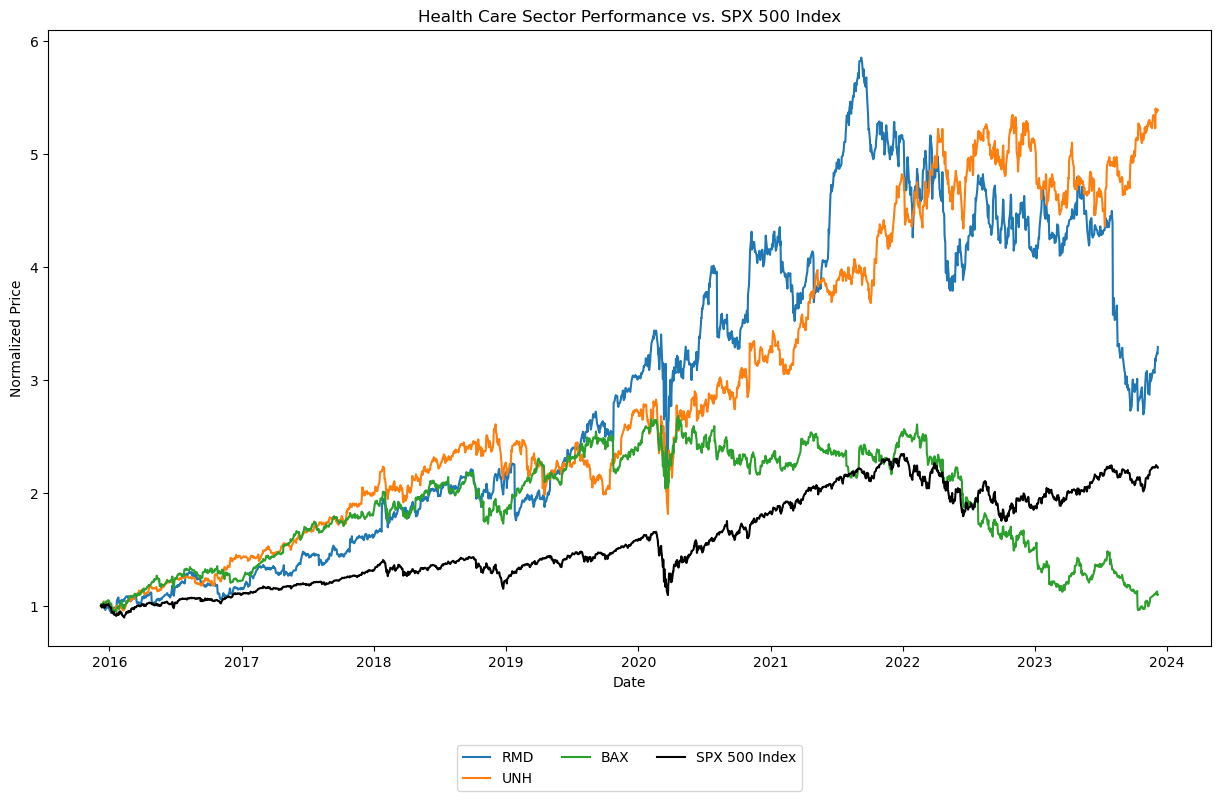

No filtered stocks to display for sector: Consumer Discretionary
No filtered stocks to display for sector: Communications
[*********************100%%**********************]  9 of 9 completed


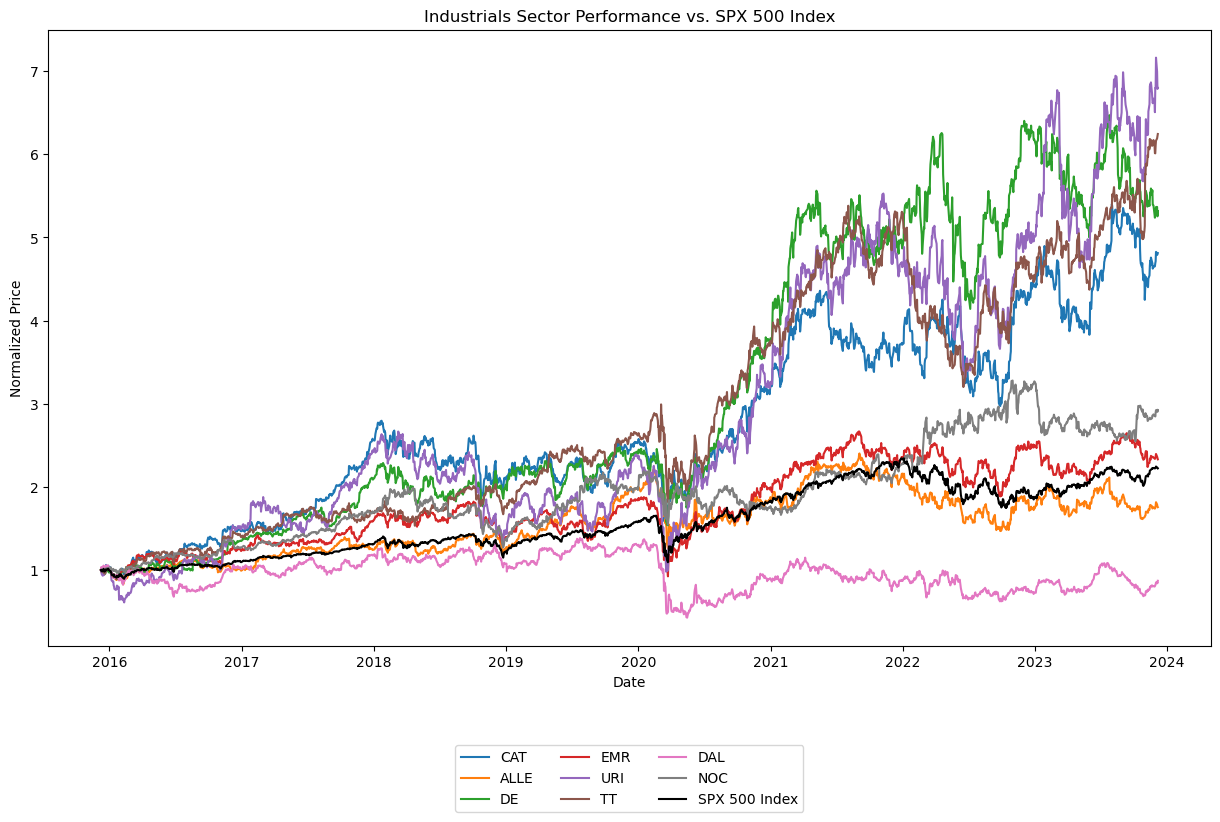

No filtered stocks to display for sector: Consumer Staples
No filtered stocks to display for sector: Energy
No filtered stocks to display for sector: Real Estate
[*********************100%%**********************]  2 of 2 completed


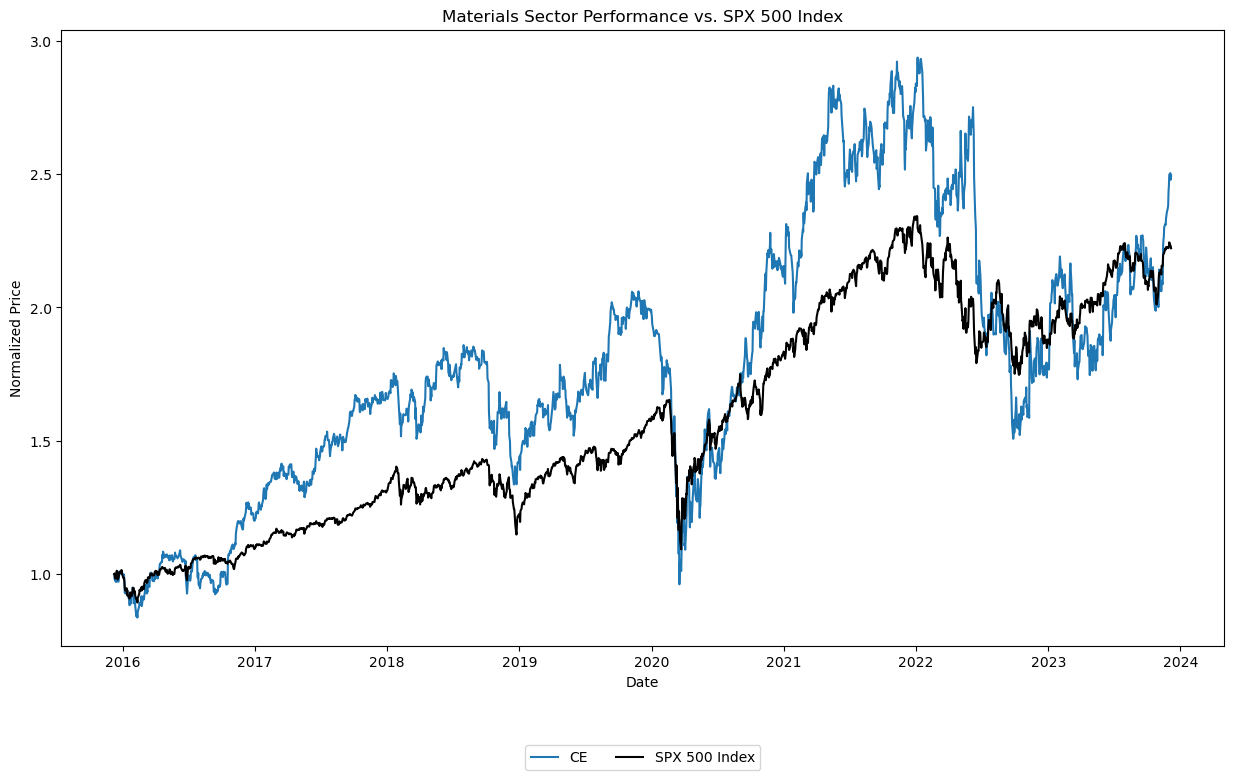

[*********************100%%**********************]  2 of 2 completed


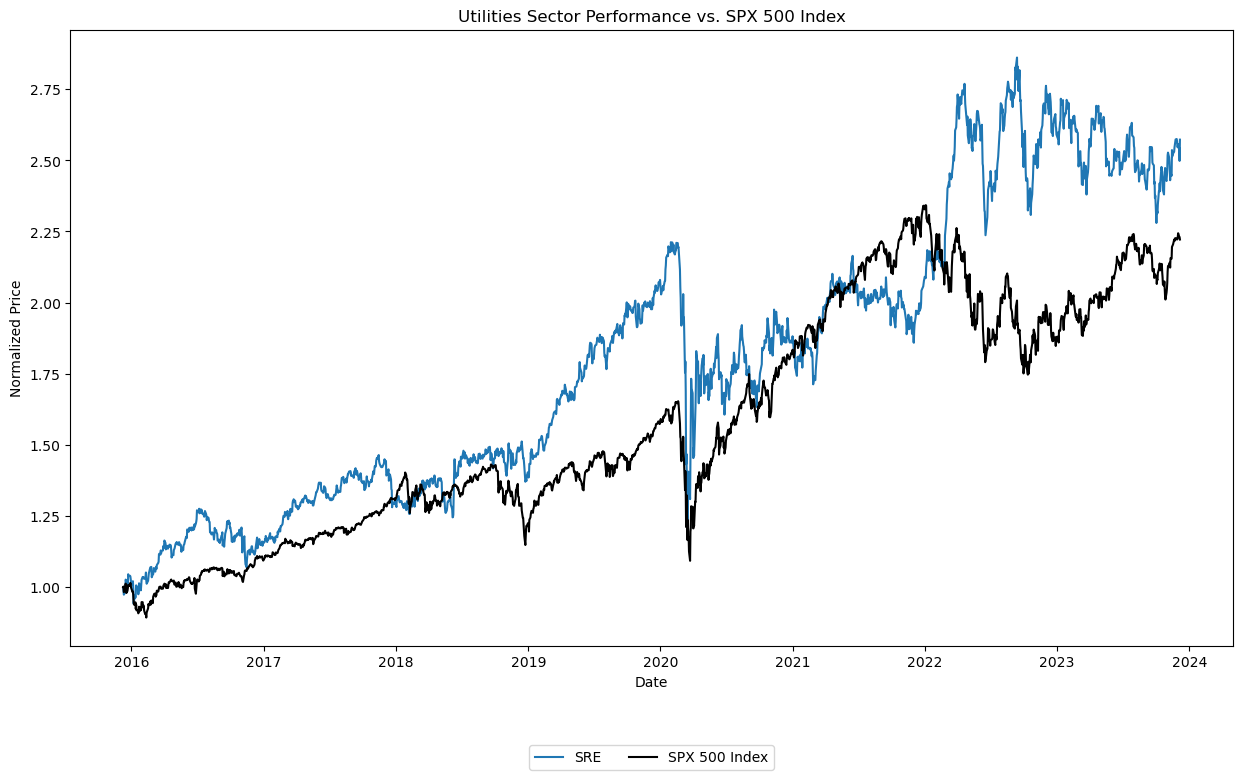

In [19]:
def plot_sector_performance(filtered_stocks_by_sector, index_ticker):
    end_date = datetime.date.today()
    start_date = end_date - datetime.timedelta(days=8*365)  # Last 8 years

    for sector, stocks_df in filtered_stocks_by_sector.items():
        if stocks_df.empty:
            print(f"No filtered stocks to display for sector: {sector}")
            continue

        stock_list = stocks_df['Ticker'].unique().tolist()
        try:
            # Fetch historical data
            historical_data = yf.download(stock_list + [index_ticker], start=start_date, end=end_date)
            normalized_data = historical_data['Adj Close'] / historical_data['Adj Close'].iloc[0]

            # Plotting
            plt.figure(figsize=(15, 8))
            for stock in stock_list:
                if stock in normalized_data.columns:
                    plt.plot(normalized_data[stock], label=stock)

            plt.plot(normalized_data[index_ticker], label='SPX 500 Index', color='black')
            plt.title(f'{sector} Sector Performance vs. SPX 500 Index')
            plt.xlabel('Date')
            plt.ylabel('Normalized Price')
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
            plt.show()

        except Exception as e:
            print(f"An error occurred while processing data for sector: {sector}. Error: {e}")

# Assuming 'filtered_stocks' is a dictionary with sector names as keys
plot_sector_performance(filtered_stocks, index_ticker='^GSPC')


In [20]:
def fetch_historical_data(stock_list, start_date, end_date):
    """
    Fetches historical adjusted closing prices for a list of stocks.
    :param stock_list: List of stock tickers
    :param start_date: Start date for historical data
    :param end_date: End date for historical data
    :return: DataFrame with historical data
    """
    data = yf.download(stock_list, start=start_date, end=end_date)
    return data['Adj Close']

# Assuming 'filtered_stocks' is a dictionary with sector names as keys
# and DataFrames of filtered stocks as values, each DataFrame should have a 'Ticker' column

# Extract all unique tickers from the filtered stocks
all_filtered_tickers = set()
for sector_data in filtered_stocks.values():
    tickers = sector_data['Ticker'].unique()  # Assuming 'Ticker' column contains stock tickers
    all_filtered_tickers.update(tickers)

# Convert set to list for yfinance download
filtered_stock_list = list(all_filtered_tickers)

# Define the historical range for backtesting (last 5 years)
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=5*365)

# Fetch historical data
historical_stock_data = fetch_historical_data(filtered_stock_list, start_date, end_date)

# Display the first few rows of the fetched data
print(historical_stock_data.head())

[*********************100%%**********************]  13 of 13 completed
                 ALLE        BAX         CAT         CE        DAL  \
Date                                                                 
2018-12-10  82.117332  60.302643  109.239769  80.192574  54.188740   
2018-12-11  82.192635  60.956501  109.106972  79.111198  53.775013   
2018-12-12  82.691582  61.702457  110.992722  79.334610  54.140636   
2018-12-13  82.315025  61.656414  111.461945  78.476646  51.523567   
2018-12-14  81.484619  60.505238  112.232155  77.475685  51.485077   

                    DE        EMR         NOC         RMD        SRE  \
Date                                                                   
2018-12-10  136.597610  55.005726  249.211060  107.841965  42.099239   
2018-12-11  136.569763  54.768276  247.154495  108.835373  42.414478   
2018-12-12  137.628830  53.713017  249.100281  110.000725  42.269535   
2018-12-13  137.786804  53.405235  247.016113  110.163086  42.610138   
2018-1

In [21]:
def calculate_daily_returns(historical_data):
    """
    Calculates daily returns from historical stock prices in percentage.
    :param historical_data: DataFrame with historical stock prices
    :return: DataFrame with daily returns in percentage
    """
    daily_returns = historical_data.pct_change().dropna()
    return daily_returns

# Assuming you've already fetched historical data
daily_returns_filtered_stocks = calculate_daily_returns(historical_stock_data)

# Display the first few rows of the daily returns in percentage
print(daily_returns_filtered_stocks.head())


                ALLE       BAX       CAT        CE       DAL        DE  \
Date                                                                     
2018-12-11  0.000917  0.010843 -0.001216 -0.013485 -0.007635 -0.000204   
2018-12-12  0.006070  0.012238  0.017283  0.002824  0.006799  0.007755   
2018-12-13 -0.004554 -0.000746  0.004228 -0.010814 -0.048338  0.001148   
2018-12-14 -0.010088 -0.018671  0.006910 -0.012755 -0.000747  0.004720   
2018-12-17 -0.031037 -0.022983 -0.018143 -0.026301 -0.020931 -0.019663   

                 EMR       NOC       RMD       SRE        TT       UNH  \
Date                                                                     
2018-12-11 -0.004317 -0.008252  0.009212  0.007488 -0.005321  0.002589   
2018-12-12 -0.019268  0.007873  0.010707 -0.003417  0.009052  0.012798   
2018-12-13 -0.005730 -0.008367  0.001476  0.008058 -0.008258  0.005580   
2018-12-14 -0.004775 -0.019190 -0.020810  0.007568 -0.013466 -0.026199   
2018-12-17 -0.028458 -0.020821 -0.019

In [22]:
# Create a DataFrame for market capitalizations
market_caps = pd.DataFrame()

for sector_data in filtered_stocks.values():
    market_caps = pd.concat([market_caps, sector_data[['Ticker', 'Market Cap']]])

# Set the 'Ticker' column as the index
market_caps.set_index('Ticker', inplace=True)

def calculate_portfolio_weights(market_caps):
    total_market_cap = market_caps['Market Cap'].sum()
    weights = market_caps['Market Cap'] / total_market_cap
    return weights

# Calculate the weights
weights = calculate_portfolio_weights(market_caps)

def simulate_value_weighted_portfolio(daily_returns, weights):
    weighted_returns = daily_returns.multiply(weights, axis='columns')
    portfolio_returns = weighted_returns.sum(axis=1)
    return portfolio_returns

# Make sure the daily returns DataFrame columns align with the market caps DataFrame index
aligned_daily_returns = daily_returns_filtered_stocks[weights.index]

# Calculate the portfolio returns
value_weighted_portfolio_returns = simulate_value_weighted_portfolio(aligned_daily_returns, weights)

# Display the first few rows of the portfolio returns
print(value_weighted_portfolio_returns.head())

daily_returns_filtered_stocks = daily_returns_filtered_stocks.apply(pd.to_numeric, errors='coerce')
weights = weights.apply(pd.to_numeric, errors='coerce')


Date
2018-12-11    0.000413
2018-12-12    0.011204
2018-12-13    0.001293
2018-12-14   -0.014681
2018-12-17    -0.02349
dtype: object


In [23]:
#Benchmark Comparison
def fetch_benchmark_data(benchmark_ticker, start_date, end_date):
    benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)
    return benchmark_data['Adj Close']

def calculate_total_and_annualized_returns(daily_returns):
    total_return = (daily_returns + 1).prod() - 1
    annualized_return = ((1 + total_return) ** (365 / len(daily_returns))) - 1
    return total_return, annualized_return

# Define the date range for 5 years
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=5*365)

# Fetch benchmark data
benchmark_ticker = '^GSPC'  # S&P 500
benchmark_data = fetch_benchmark_data(benchmark_ticker, start_date, end_date)
benchmark_returns = calculate_daily_returns(benchmark_data)

# Calculate returns for both portfolio and benchmark
portfolio_total_return, portfolio_annualized_return = calculate_total_and_annualized_returns(value_weighted_portfolio_returns)
benchmark_total_return, benchmark_annualized_return = calculate_total_and_annualized_returns(benchmark_returns)

# Comparison
print("Portfolio vs. Benchmark Performance:")
print(f"Portfolio Total Return: {portfolio_total_return:.2%}")
print(f"Portfolio Annualized Return: {portfolio_annualized_return:.2%}")
print(f"Benchmark Total Return: {benchmark_total_return:.2%}")
print(f"Benchmark Annualized Return: {benchmark_annualized_return:.2%}")


[*********************100%%**********************]  1 of 1 completed
Portfolio vs. Benchmark Performance:
Portfolio Total Return: 139.60%
Portfolio Annualized Return: 28.91%
Benchmark Total Return: 72.47%
Benchmark Annualized Return: 17.16%


In [24]:
import numpy as np

def calculate_standard_deviation(returns):
    return returns.std()

def calculate_beta(portfolio_returns, benchmark_returns):
    # Align the data and drop NaNs
    aligned_data = pd.concat([portfolio_returns, benchmark_returns], axis=1, join='inner').dropna()
    portfolio_returns_aligned = aligned_data.iloc[:, 0]
    benchmark_returns_aligned = aligned_data.iloc[:, 1]

    # Calculate mean returns
    mean_portfolio_return = portfolio_returns_aligned.mean()
    mean_benchmark_return = benchmark_returns_aligned.mean()

    # Calculate covariance and variance
    covariance = ((portfolio_returns_aligned - mean_portfolio_return) * (benchmark_returns_aligned - mean_benchmark_return)).mean()
    variance = (benchmark_returns_aligned - mean_benchmark_return).var()

    # Calculate beta
    beta = covariance / variance
    return beta

def calculate_sharpe_ratio(portfolio_returns, risk_free_rate=0.01):
    excess_returns = portfolio_returns - risk_free_rate / 252
    return excess_returns.mean() / excess_returns.std()

# Calculate standard deviation (volatility) for both portfolio and benchmark
portfolio_volatility = calculate_standard_deviation(value_weighted_portfolio_returns)
benchmark_volatility = calculate_standard_deviation(benchmark_returns)

# Calculate beta of the portfolio
portfolio_beta = calculate_beta(value_weighted_portfolio_returns, benchmark_returns)

# Assume a risk-free rate of 1% (0.01) for Sharpe Ratio calculation
portfolio_sharpe_ratio = calculate_sharpe_ratio(value_weighted_portfolio_returns)

# Display risk metrics
print("Risk Metrics:")
print(f"Portfolio Volatility: {portfolio_volatility:.2%}")
print(f"Benchmark Volatility: {benchmark_volatility:.2%}")
print(f"Portfolio Beta: {portfolio_beta:.2f}")
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe_ratio:.2f}")


Risk Metrics:
Portfolio Volatility: 1.50%
Benchmark Volatility: 1.36%
Portfolio Beta: 0.91
Portfolio Sharpe Ratio: 0.05


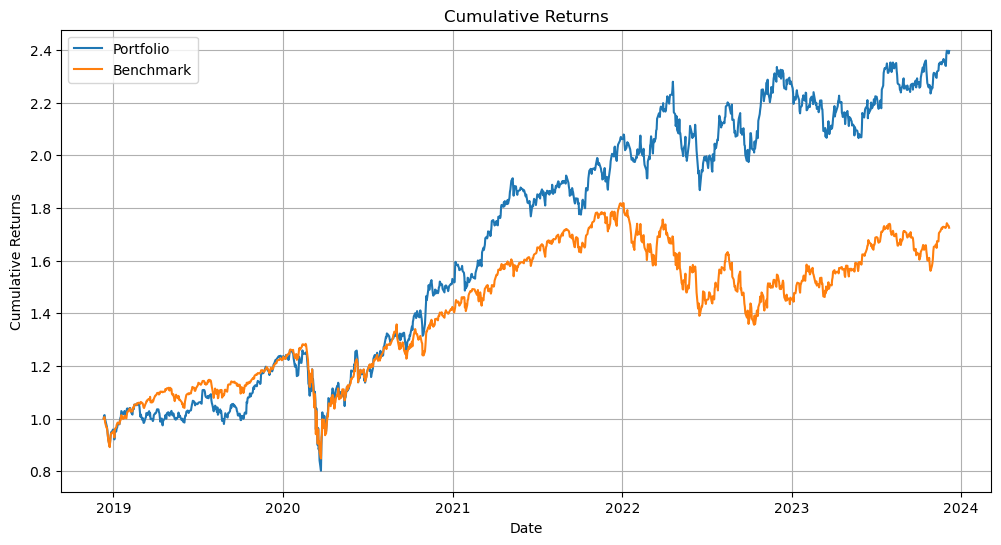

Performance Summary:
Portfolio Total Return: 1.40
Portfolio Annualized Return: 0.29
Benchmark Total Return: 0.72
Benchmark Annualized Return: 0.17


In [25]:
def plot_cumulative_returns(portfolio_returns, benchmark_returns, title="Cumulative Returns"):
    """
    Plots the cumulative returns of the portfolio and benchmark.
    """
    cumulative_returns_portfolio = (1 + portfolio_returns).cumprod()
    cumulative_returns_benchmark = (1 + benchmark_returns).cumprod()

    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_returns_portfolio, label='Portfolio')
    plt.plot(cumulative_returns_benchmark, label='Benchmark')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

def create_performance_summary(portfolio_returns, benchmark_returns):
    """
    Creates a summary of key performance metrics.
    """
    portfolio_total_return, portfolio_annualized_return = calculate_total_and_annualized_returns(portfolio_returns)
    benchmark_total_return, benchmark_annualized_return = calculate_total_and_annualized_returns(benchmark_returns)

    summary = {
        'Portfolio Total Return': portfolio_total_return,
        'Portfolio Annualized Return': portfolio_annualized_return,
        'Benchmark Total Return': benchmark_total_return,
        'Benchmark Annualized Return': benchmark_annualized_return,
        # Add other metrics like volatility, beta, Sharpe ratio here
    }

    return summary

# Plotting cumulative returns
plot_cumulative_returns(value_weighted_portfolio_returns, benchmark_returns)

# Creating a performance summary
performance_summary = create_performance_summary(value_weighted_portfolio_returns, benchmark_returns)
print("Performance Summary:")
for key, value in performance_summary.items():
    print(f"{key}: {value:.2f}")